## Importing Library

Forecast Green Energy


Can you forecast green energy in the future?



__Problem Statement


Welcome to Green - A country well known for its greenery and natural resources. Green is working towards the betterment of the environment, natural resources, and health of citizens. Over the past few years, Green has improvised its natural resources by enabling the technologies for a safer future. 


The major investment happened to be in renewable energy. As of today, renewable energy contributes to 60% of the total energy capacity in the country. By 2030, the target is to generate 95% of the total energy through renewable energy.


In order to achieve this objective, the government of Green Energy would like to use Data Science to understand the total energy demand of the country in the near future. This will help the government to build the infrastructure and technologies to achieve 95% of the total energy capacity via renewable energy.


They have captured the estimated total energy demand from the past 12 years on an hourly basis. Now, the government of Green Energy is looking for a data scientist to understand the data and forecast the total energy demand for the next 3 years based on past trends.


Help Green! Save Nature! Stay Healthy!



Objective

Your task at hand is to build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.



About the Dataset

You are provided with total energy demand on an hourly basis for the past 9 years from March 2008 to Dec 2018 in the training set. You need to forecast the total energy demand on an hourly basis for the next 3 years from 2019 to 2021 in the test set.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



### Loading data

In [10]:
data1=pd.read_csv("test_WudNWDM.csv")
data1.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [11]:
data2=pd.read_csv("train_IxoE5JN.csv")
data2.tail()

,row_id,datetime,energy
94987,94988,2018-12-31 19:00:00,2528.4468
94988,94989,2018-12-31 20:00:00,2461.8836
94989,94990,2018-12-31 21:00:00,2365.9944
94990,94991,2018-12-31 22:00:00,2342.9428
94991,94992,2018-12-31 23:00:00,2180.2176


In [12]:
data2.shape

(94992, 3)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [14]:
data2.describe()

,row_id,energy
count,94992.000000,93092.000000
mean,47496.500000,1702.995014
std,27421.972723,369.322103
min,1.000000,866.388600
25%,23748.750000,1431.541100
50%,47496.500000,1654.465800
75%,71244.250000,1935.993450
max,94992.000000,3374.399600


In [15]:
data2.isna().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [16]:
data2.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [17]:
print(data2['datetime'].unique())

['2008-03-01 00:00:00' '2008-03-01 01:00:00' '2008-03-01 02:00:00' ...
 '2018-12-31 21:00:00' '2018-12-31 22:00:00' '2018-12-31 23:00:00']


In [18]:
data2[data2['energy'].isna()]

,row_id,datetime,energy
92,93,2008-03-04 20:00:00,NaN
207,208,2008-03-09 15:00:00,NaN
217,218,2008-03-10 01:00:00,NaN
448,449,2008-03-19 16:00:00,NaN
519,520,2008-03-22 15:00:00,NaN
...,...,...,...
94685,94686,2018-12-19 05:00:00,NaN
94722,94723,2018-12-20 18:00:00,NaN
94737,94738,2018-12-21 09:00:00,NaN
94758,94759,2018-12-22 06:00:00,NaN


In [19]:
data2['energy'].replace(np.nan,data2['energy'].median(),inplace=True)

<AxesSubplot:>

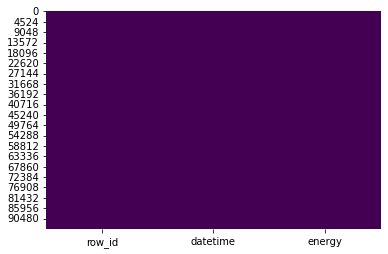

In [20]:
sns.heatmap(data2.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

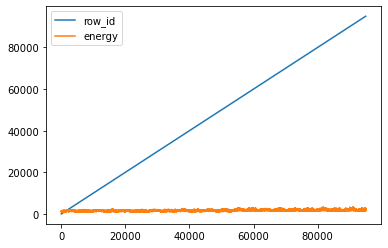

In [21]:
data2.plot()

<AxesSubplot:>

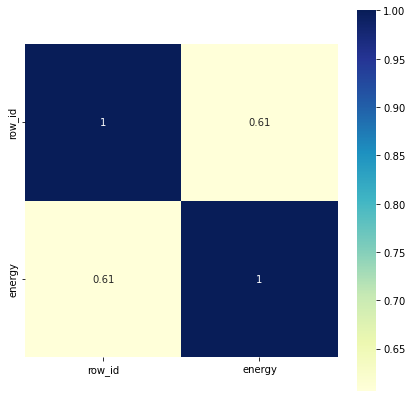

In [22]:
corr=data2.corr()
plt.figure(figsize=(7,7))
sns.heatmap(data=corr,annot=True,square=True,cmap="YlGnBu")

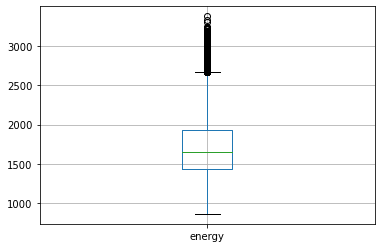

In [23]:
data2.boxplot(column=["energy"])
plt.show()

In [24]:
data2.head(10)

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
5,6,2008-03-01 05:00:00,1033.768500
6,7,2008-03-01 06:00:00,1086.780000
7,8,2008-03-01 07:00:00,1211.742000
8,9,2008-03-01 08:00:00,1293.693000
9,10,2008-03-01 09:00:00,1318.915500


<AxesSubplot:ylabel='Density'>

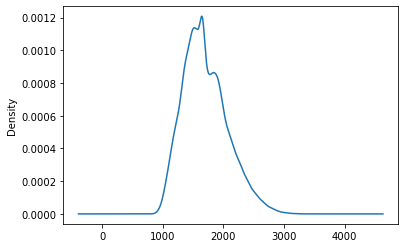

In [25]:
data2['energy'].plot(kind='kde')

In [26]:
#data2.groupby('energy')['datetime'].plot(kind='kde')

In [27]:
from datetime import datetime
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
# print(type(dateparse))
data = pd.read_csv('train_IxoE5JN.csv', parse_dates=[1], index_col='datetime',date_parser=dateparse)
print(data.head())

                     row_id       energy
datetime                                
2008-03-01 00:00:00       1  1259.985563
2008-03-01 01:00:00       2  1095.541500
2008-03-01 02:00:00       3  1056.247500
2008-03-01 03:00:00       4  1034.742000
2008-03-01 04:00:00       5  1026.334500


In [28]:
data.index

DatetimeIndex(['2008-03-01 00:00:00', '2008-03-01 01:00:00',
               '2008-03-01 02:00:00', '2008-03-01 03:00:00',
               '2008-03-01 04:00:00', '2008-03-01 05:00:00',
               '2008-03-01 06:00:00', '2008-03-01 07:00:00',
               '2008-03-01 08:00:00', '2008-03-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=94992, freq=None)

In [29]:
ts = data['energy']
ts.dropna(inplace=True)
ts.head(10)

datetime
2008-03-01 00:00:00    1259.985563
2008-03-01 01:00:00    1095.541500
2008-03-01 02:00:00    1056.247500
2008-03-01 03:00:00    1034.742000
2008-03-01 04:00:00    1026.334500
2008-03-01 05:00:00    1033.768500
2008-03-01 06:00:00    1086.780000
2008-03-01 07:00:00    1211.742000
2008-03-01 08:00:00    1293.693000
2008-03-01 09:00:00    1318.915500
Name: energy, dtype: float64

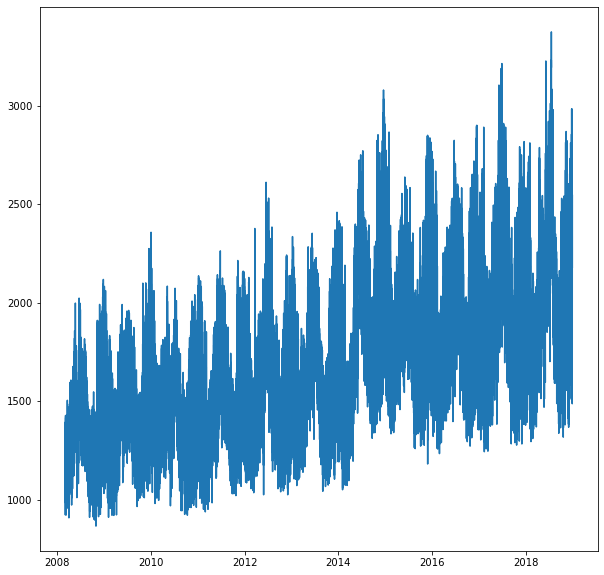

In [30]:
plt.figure(figsize=(10,10))
plt.plot(ts)

### Dickey-Fuller Test

In [31]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

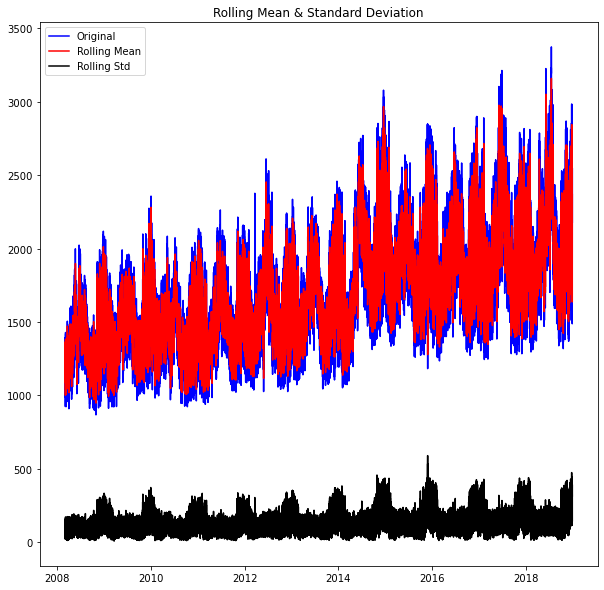

Results of Dickey-Fuller Test:
Test Statistic                -9.527076e+00
p-value                        2.958121e-16
#Lags Used                     6.700000e+01
Number of Observations Used    9.302400e+04
Critical Value (1%)           -3.430420e+00
Critical Value (5%)           -2.861571e+00
Critical Value (10%)          -2.566787e+00
dtype: float64


In [32]:
plt.figure(figsize=(10,10))
test_stationarity(ts)

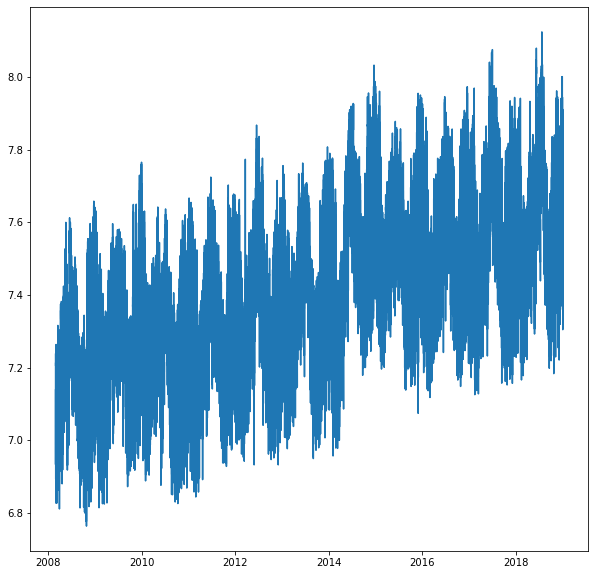

In [33]:
plt.figure(figsize=(10,10))
ts_log = np.log(ts)
plt.plot(ts_log)

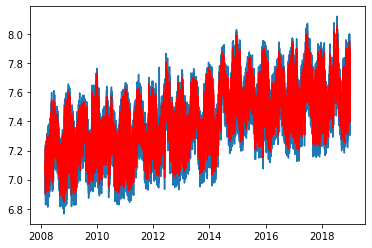

In [34]:
moving_avg =  pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [35]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

datetime
2008-03-01 00:00:00         NaN
2008-03-01 01:00:00         NaN
2008-03-01 02:00:00         NaN
2008-03-01 03:00:00         NaN
2008-03-01 04:00:00         NaN
2008-03-01 05:00:00         NaN
2008-03-01 06:00:00         NaN
2008-03-01 07:00:00         NaN
2008-03-01 08:00:00         NaN
2008-03-01 09:00:00         NaN
2008-03-01 10:00:00         NaN
2008-03-01 11:00:00    0.143431
Name: energy, dtype: float64

In [36]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

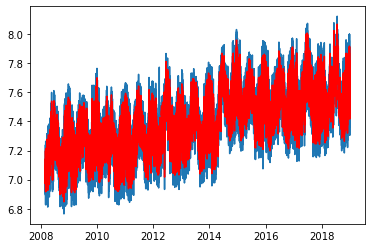

In [37]:
expwighted_avg = pd.DataFrame.ewm(ts_log,span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [38]:
ts_log_ewma_diff = ts_log - expwighted_avg
# test_stationarity(ts_log_ewma_diff)

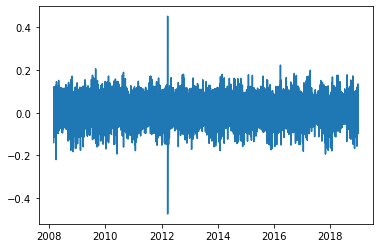

In [39]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [40]:
ts_log_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)

In [42]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

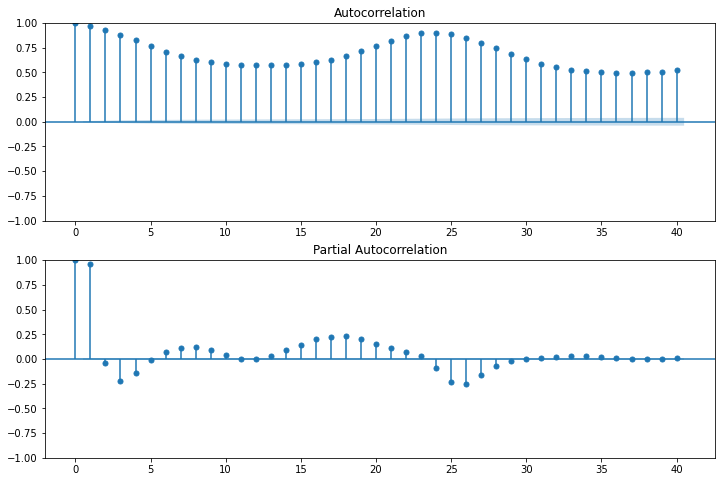

In [45]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['energy'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['energy'].iloc[13:],lags=40,ax=ax2)

Text(0.5, 1.0, 'Autocorrelation Function')

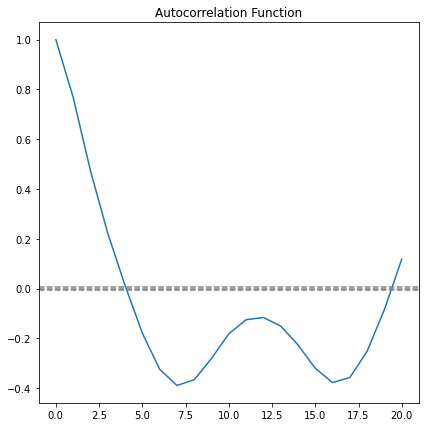

In [46]:
plt.figure(figsize=(15,7))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

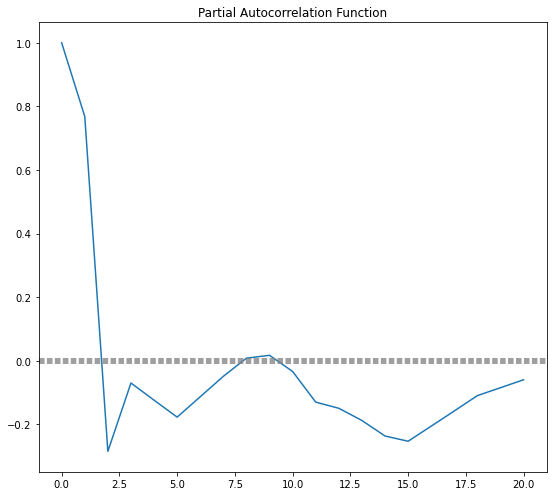

In [47]:
#Plot PACF:
plt.figure(figsize=(15,7))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


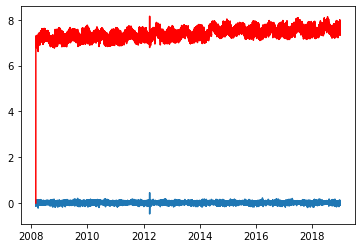

In [48]:

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(ts_log, order=(2,1,2))


results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')


In [49]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(ts_log, order=(1,1,1))


results_ARIMA = model.fit()  
# plt.plot(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

datetime
2008-03-01 00:00:00    0.000000
2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.891005
2008-03-01 03:00:00    6.958847
2008-03-01 04:00:00    6.923314
dtype: float64


In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

datetime
2008-03-01 00:00:00     0.000000
2008-03-01 01:00:00     7.138856
2008-03-01 02:00:00    14.029860
2008-03-01 03:00:00    20.988708
2008-03-01 04:00:00    27.912022
dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

datetime
2008-03-01 00:00:00     7.138856
2008-03-01 01:00:00    14.137860
2008-03-01 02:00:00    20.992338
2008-03-01 03:00:00    27.930615
2008-03-01 04:00:00    34.845771
dtype: float64

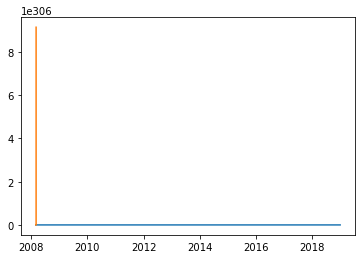

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [54]:
forecast = results_ARIMA.forecast(26304)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
forecast.head()

93092    7.618187
93093    7.572846
93094    7.543049
93095    7.523467
93096    7.510598
Name: predicted_mean, dtype: float64

In [56]:
start_index = datetime(2019, 1, 1)
end_index = datetime(2021, 12, 31)

results_ARIMA.predict()

datetime
2008-03-01 00:00:00    0.000000
2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.891005
2008-03-01 03:00:00    6.958847
2008-03-01 04:00:00    6.923314
                         ...   
2018-12-31 19:00:00    7.855680
2018-12-31 20:00:00    7.824264
2018-12-31 21:00:00    7.786459
2018-12-31 22:00:00    7.737576
2018-12-31 23:00:00    7.759227
Name: predicted_mean, Length: 93092, dtype: float64

In [57]:
forecast = np.exp(forecast)

In [58]:
forecast.tail

<bound method NDFrame.tail of 93092     2034.869515
93093     1944.667152
93094     1887.576423
93095     1850.973253
93096     1827.305724
             ...     
119391    1782.778144
119392    1782.778144
119393    1782.778144
119394    1782.778144
119395    1782.778144
Name: predicted_mean, Length: 26304, dtype: float64>

In [60]:
forecast = results_ARIMA.forecast(steps=26304)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
forecast
len(forecast)

26304

In [62]:
data1=pd.read_csv("test_WudNWDM.csv")
data1.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [63]:
forecast

93092     7.618187
93093     7.572846
93094     7.543049
93095     7.523467
93096     7.510598
            ...   
119391    7.485928
119392    7.485928
119393    7.485928
119394    7.485928
119395    7.485928
Name: predicted_mean, Length: 26304, dtype: float64

In [64]:
forecast = np.exp(forecast)

In [65]:
data1.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [66]:
test = data1['row_id']
test.head()

0    94993
1    94994
2    94995
3    94996
4    94997
Name: row_id, dtype: int64

In [67]:
test['energy'] = forecast

In [68]:
test = pd.read_csv('test_WudNWDM.csv')

In [69]:
test = test['row_id']

In [70]:
type(test)

pandas.core.series.Series

In [71]:
test = test.to_numpy()

In [72]:
test

array([ 94993,  94994,  94995, ..., 121294, 121295, 121296], dtype=int64)

In [73]:
submit = pd.DataFrame( {
        "row_id": test,
        "energy": forecast
})

In [74]:
submit.to_csv('submission.csv')

In [75]:
forecast = forecast.astype(float)

In [76]:
submit = pd.DataFrame( {
        "row_id": test,
        "energy": forecast
})
submit = submit[['row_id', 'energy']]
submit.to_csv('submission.csv', index=False)

In [82]:
i = 1
while True:
    if i%3 == 0:
        break
    print(i, end=" ")
    i = i + 1

1 2 

In [83]:
numbers = [10, 20]
items = ["Chair", "Table"]
for x in numbers[-1::]:
    for y in items[0:1]:
        print(x,y)

20 Chair


In [84]:
def v_c(s):
    v =[]
    count = 0 
    for i in s:
        if i not in 'abcdefghijklmnopqrstuvwxyz0123456789':
            v.append(i)
            count += 1
    b = set(v)
    return len(b)

if __name__=="__main__":
    print(v_c("##AZb7$#3analytics"))

4


In [86]:
"True"=="true"

False

In [87]:
def ab(list):
    print(list)
    list[2]=30
    return list
list=[10,20,30]
print(ab(list))
    

[10, 20, 30]
[10, 20, 30]
